In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets from CSV file to Pandas DataFrame
car_data = pd.read_csv("car data.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# Finding the missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
# Finding Duplicate values
car_data.duplicated().sum()

2

In [5]:
# Handling duplicate values
car_data.drop_duplicates(inplace=True)
car_data.duplicated().sum()

0

In [6]:
# Getting some information about dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [7]:
# Cheaking the distribution of categorical data

print(car_data['Car_Name'].value_counts())
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


In [8]:
# Dropping 'Car_Name' column from the dataset
car_data.drop(columns=['Car_Name'],axis=1,inplace=True)

In [9]:
#Encoding the all categorical columns of car_data dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in car_data.columns:
    if car_data[column].dtype == np.number:
        continue
    car_data[column] = le.fit_transform(car_data[column])

C:\Users\Tanvir Ahmed\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [10]:
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,3.35,5.59,86,2,0,1,0
1,10,4.75,9.54,135,1,0,1,0
2,14,7.25,9.85,26,2,0,1,0
3,8,2.85,4.15,18,2,0,1,0
4,11,4.60,6.87,134,1,0,1,0
...,...,...,...,...,...,...,...,...
296,13,9.50,11.60,103,1,0,1,0
297,12,4.00,5.90,172,2,0,1,0
298,6,3.35,11.00,193,2,0,1,0
299,14,11.50,12.50,31,1,0,1,0


In [11]:
# Extracting Independent and Dependent column
x = car_data.drop(columns=['Selling_Price'],axis=1)
y = car_data['Selling_Price']

In [12]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,5.59,86,2,0,1,0
1,10,9.54,135,1,0,1,0
2,14,9.85,26,2,0,1,0
3,8,4.15,18,2,0,1,0
4,11,6.87,134,1,0,1,0
...,...,...,...,...,...,...,...
296,13,11.60,103,1,0,1,0
297,12,5.90,172,2,0,1,0
298,6,11.00,193,2,0,1,0
299,14,12.50,31,1,0,1,0


In [13]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [14]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
print(car_data.shape,x_train.shape,x_test.shape)

(299, 8) (239, 7) (60, 7)


# Training the model to Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

 # Model Evaluation

In [17]:
# Training data accuracy
print("Trianing Data Accuracy:",lin_reg.score(x_train,y_train))

Trianing Data Accuracy: 0.8885646701713119


In [18]:
# Predicting the training dataset
predicted_train_data = lin_reg.predict(x_train)
predicted_train_data

array([ 8.46785350e-01,  4.41645747e-01,  2.29046270e+00,  2.48045054e+00,
        3.73719918e+00,  1.98542691e+00,  3.30277040e+00, -2.00019277e+00,
        1.68642705e+00,  1.87369244e+00,  6.90462091e+00,  5.67567909e+00,
       -2.70954199e-01,  4.77636633e+00,  3.18124641e+00,  9.34208296e-01,
        9.52480883e+00,  4.79423933e+00,  3.07836889e+00,  4.89170084e+00,
        1.73591629e+00,  6.11454025e+00,  5.83949980e+00,  7.50363288e+00,
        5.61856306e+00,  9.60390735e-01,  8.71381577e+00,  7.19887284e+00,
        5.34100139e+00,  2.01842673e+00,  5.65642685e+00,  2.11637467e+00,
        3.76886120e-01,  3.40613731e+00,  4.24984492e+01,  1.02561119e+01,
        2.32000433e+00,  2.99286940e+00,  8.19258459e+00,  4.55251942e+00,
        3.62341763e-01,  5.13960574e+00,  5.06187413e+00,  7.07086932e-01,
        1.44352459e+00,  8.55073815e+00,  5.73757266e+00,  1.27327468e+00,
        7.90507201e+00,  8.18049654e+00,  2.72364922e+00, -1.15341011e+00,
        1.43246149e+00,  

In [20]:
# R Squared Error
from sklearn.metrics import r2_score
error_score = r2_score(predicted_train_data,y_train)
print("R Squared Error:",error_score)

R Squared Error: 0.8745895109613083


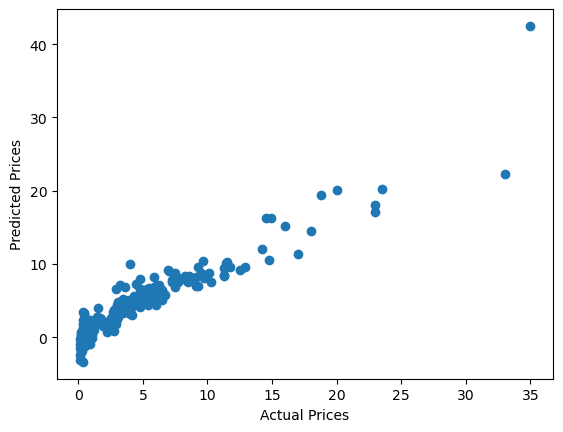

In [21]:
# Visualizing Actual Prices vs Predicted Prices of training dataset
plt.scatter(y_train,predicted_train_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [22]:
# Test data accuracy
print("Test Data Accuracy:",lin_reg.score(x_test,y_test))

Test Data Accuracy: 0.803174235585372


In [23]:
# Predicting the training dataset
predicted_test_data = lin_reg.predict(x_test)
predicted_test_data

array([ 0.26936794,  6.65252344,  5.79379329,  7.11506809, -1.49548176,
        1.98229552,  0.73600911,  0.28011463,  2.69191841,  1.18394323,
        5.28723415,  4.89685034,  4.37141886,  6.29741849, 10.63983237,
        6.57399593,  6.8947632 , 16.31632629,  3.84909221,  4.58534829,
        3.21967037,  2.56131077,  4.44016202,  0.91219447,  0.81061808,
        1.99853192,  6.90881751,  4.6390924 ,  1.56803445,  0.43479353,
        1.20845688, 10.18410444,  5.64997302,  2.98310004,  7.37708188,
        9.35812048,  3.3248966 ,  1.70541588,  2.31713037,  6.34055535,
        7.33768641,  4.42539738,  1.96038798,  2.21510187, -0.33699262,
        4.58937413, -2.24919708,  5.26434996,  7.5348015 ,  1.94710751,
        2.15176732,  2.80069696,  4.89939468,  9.39857088,  0.64957346,
       14.60582481,  2.03706117,  4.44459585,  2.06780923,  5.37418628])

In [24]:
# R Squared Error
from sklearn.metrics import r2_score
error_score = r2_score(predicted_test_data,y_test)
print("R Squared Error:",error_score)

R Squared Error: 0.7342374602751272


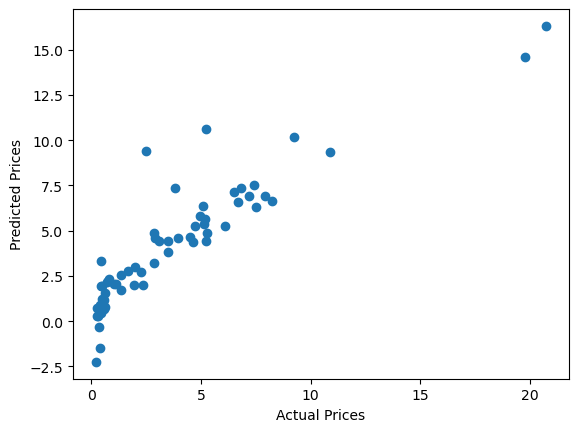

In [25]:
# Visualizing Actual Prices vs Predicted Prices of test dataset
plt.scatter(y_test,predicted_test_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Training the model to Lasso Model

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

# Model Evaluation

In [27]:
# Training data accuracy
print("Trianing Data Accuracy:",lasso.score(x_train,y_train))

Trianing Data Accuracy: 0.853151892033131


In [28]:
# Test data accuracy
print("Test Data Accuracy:",lin_reg.score(x_test,y_test))

Test Data Accuracy: 0.803174235585372


# Training the model to Ridge Model

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

# Model Evaluation

In [30]:
# Training data accuracy
print("Trianing Data Accuracy:",ridge.score(x_train,y_train))

Trianing Data Accuracy: 0.8885312734872256


In [31]:
# Test data accuracy
print("Test Data Accuracy:",ridge.score(x_test,y_test))

Test Data Accuracy: 0.8042954000497925


# Comparing 3 different models,we can see that,Lasso model is suitable for this dataset